## Bradley-Terry model tests

On va d'abord tenter de produire des données factices: on associe à chaque joueur sa force

In [2]:
import numpy as np

X = np.random.normal(0, 6, size=100)
X = (X - np.min(X)) / (np.max(X) - np.min(X))

X.sort()

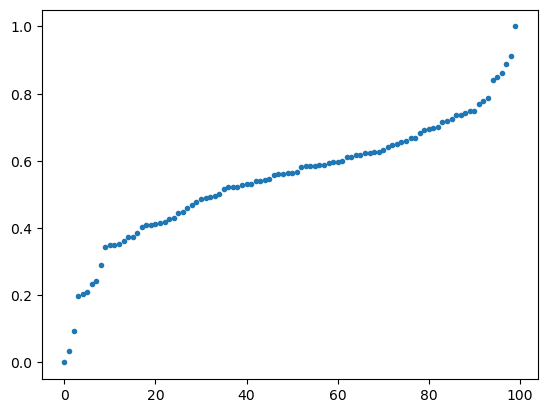

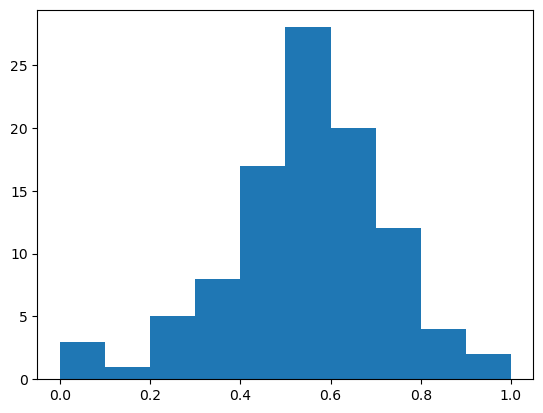

In [3]:
import matplotlib.pyplot as plt

plt.plot(X,'.')
plt.show()
plt.hist(X)
plt.show()

In [4]:
def BT_proba(Vi,Vj):
    return Vi/(Vi+Vj)

def BT_score(i,X):
    Vi = X[i]
    Score = 0
    for j in range(len(X)):
        if i != j:
            Vj = X[j]
            proba = BT_proba(Vi,Vj)
            Score += np.random.binomial(1,proba)
    return Score

def BT_tournament(X):
    Scores = []
    for i in range(len(X)):
        Scores.append(BT_score(i,X))
    winner = Scores.index(max(Scores))
    return Scores, winner


In [5]:
print(BT_score(0,X))
print(BT_tournament(X))

0
([0, 11, 15, 29, 36, 33, 33, 30, 44, 38, 43, 39, 35, 46, 42, 49, 47, 31, 52, 48, 46, 46, 50, 41, 48, 41, 54, 50, 43, 43, 40, 54, 52, 48, 50, 43, 45, 47, 52, 46, 44, 51, 52, 44, 59, 51, 55, 54, 57, 48, 46, 54, 55, 50, 45, 57, 49, 50, 59, 61, 56, 56, 56, 55, 55, 62, 59, 53, 51, 53, 63, 53, 47, 51, 57, 48, 57, 54, 48, 60, 59, 61, 49, 54, 61, 61, 56, 61, 60, 54, 62, 57, 59, 49, 63, 60, 57, 56, 64, 65], 99)


#### Test de la classe qu'on vient de coder

In [6]:
from Bradley_Terry import BT_Tournament

tournoi = BT_Tournament(X)

print(tournoi.compute_probs(1,35))
print(tournoi.score(1))

print(tournoi.winner())

0.06052452440257394
9
78


## Sur un jeu de données d'un tournoi réel

In [7]:
import pandas as pd

ligue1 = pd.read_csv('https://raw.githubusercontent.com/datasets/football-datasets/refs/heads/main/datasets/ligue-1/season-2223.csv')
ligue1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/22,Lyon,Ajaccio,2,1,H,2,1,H,NaN,...,6,4,10,18,4,3,1,6,1,1
1,06/08/22,Strasbourg,Monaco,1,2,A,0,1,A,NaN,...,7,11,18,15,3,7,0,2,0,0
2,06/08/22,Clermont,Paris SG,0,5,A,0,3,A,NaN,...,1,12,13,13,0,6,2,1,0,0
3,07/08/22,Toulouse,Nice,1,1,D,1,0,H,NaN,...,4,4,10,8,6,3,1,2,0,0
4,07/08/22,Angers,Nantes,0,0,D,0,0,D,NaN,...,6,4,15,13,3,6,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,03/06/23,Nantes,Angers,1,0,H,1,0,H,NaN,...,7,1,12,13,8,1,1,0,0,0
376,03/06/23,Nice,Lyon,3,1,H,3,1,H,NaN,...,6,7,8,12,3,2,0,1,0,0
377,03/06/23,Paris SG,Clermont,2,3,A,2,2,D,NaN,...,6,5,17,11,6,2,2,1,0,0
378,03/06/23,Reims,Montpellier,1,3,A,1,0,H,NaN,...,5,8,16,9,4,7,1,2,0,0


Nettoyage de toute cette merde

In [8]:
ligue1 = ligue1.dropna(axis='columns')
ligue1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/22,Lyon,Ajaccio,2,1,H,2,1,H,11,...,6,4,10,18,4,3,1,6,1,1
1,06/08/22,Strasbourg,Monaco,1,2,A,0,1,A,11,...,7,11,18,15,3,7,0,2,0,0
2,06/08/22,Clermont,Paris SG,0,5,A,0,3,A,7,...,1,12,13,13,0,6,2,1,0,0
3,07/08/22,Toulouse,Nice,1,1,D,1,0,H,6,...,4,4,10,8,6,3,1,2,0,0
4,07/08/22,Angers,Nantes,0,0,D,0,0,D,16,...,6,4,15,13,3,6,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,03/06/23,Nantes,Angers,1,0,H,1,0,H,11,...,7,1,12,13,8,1,1,0,0,0
376,03/06/23,Nice,Lyon,3,1,H,3,1,H,16,...,6,7,8,12,3,2,0,1,0,0
377,03/06/23,Paris SG,Clermont,2,3,A,2,2,D,16,...,6,5,17,11,6,2,2,1,0,0
378,03/06/23,Reims,Montpellier,1,3,A,1,0,H,11,...,5,8,16,9,4,7,1,2,0,0


Fabrication d'un dataframe dans lequel on agrège les victoires de chaque équipe.

In [9]:
def total_wins(ligue1):

    home_wins = ligue1[ligue1['FTR'] == 'H'].groupby('HomeTeam').size().reset_index(name='HomeWins').rename(columns={'HomeTeam': 'Team'})
    away_wins = ligue1[ligue1['FTR'] == 'A'].groupby('AwayTeam').size().reset_index(name='AwayWins').rename(columns={'AwayTeam': 'Team'})

    wins = pd.merge(home_wins,away_wins, on='Team')
    wins['TotalWins'] = wins['HomeWins'] + wins ['AwayWins']
    return wins

wins = total_wins(ligue1)
wins

,Team,HomeWins,AwayWins,TotalWins
0,Ajaccio,4,3,7
1,Angers,3,1,4
2,Auxerre,5,3,8
3,Brest,7,4,11
4,Clermont,9,8,17
5,Lens,17,8,25
6,Lille,13,6,19
7,Lorient,9,6,15
8,Lyon,10,8,18
9,Marseille,10,12,22


<AxesSubplot: xlabel='TotalWins', ylabel='Count'>

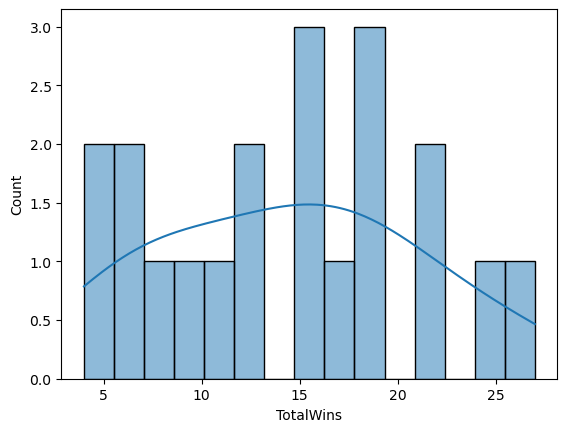

In [10]:
import seaborn as sns

sns.histplot(wins['TotalWins'],bins=15,kde=True)

In [11]:
proba_Ajaccio = BT_score(0,wins['TotalWins'])
proba_Ajaccio

8

Division entre les deux parties de la saison (que les matchs aller)

In [12]:
ligue1_aller = ligue1.iloc[:190]
ligue1_retour = ligue1.iloc[190:]

ligue1_aller

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/22,Lyon,Ajaccio,2,1,H,2,1,H,11,...,6,4,10,18,4,3,1,6,1,1
1,06/08/22,Strasbourg,Monaco,1,2,A,0,1,A,11,...,7,11,18,15,3,7,0,2,0,0
2,06/08/22,Clermont,Paris SG,0,5,A,0,3,A,7,...,1,12,13,13,0,6,2,1,0,0
3,07/08/22,Toulouse,Nice,1,1,D,1,0,H,6,...,4,4,10,8,6,3,1,2,0,0
4,07/08/22,Angers,Nantes,0,0,D,0,0,D,16,...,6,4,15,13,3,6,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,15/01/23,Montpellier,Nantes,0,3,A,0,1,A,11,...,5,7,13,14,3,5,1,2,2,0
186,15/01/23,Reims,Nice,0,0,D,0,0,D,13,...,2,4,5,5,5,3,1,1,0,0
187,15/01/23,Toulouse,Brest,1,1,D,0,1,A,16,...,7,5,16,12,10,5,2,2,0,0
188,15/01/23,Monaco,Ajaccio,7,1,H,5,1,H,11,...,8,2,8,14,3,3,1,2,0,0


### On tente de prédire le gagnant des matchs retours à partir des données sur les matchs aller

In [13]:
wins= total_wins(ligue1_aller)
Tligue1 = BT_Tournament(wins["TotalWins"])

winner_index = Tligue1.winner()
winner = wins.iloc[winner_index]

winner

Team         Clermont
HomeWins            4
AwayWins            4
TotalWins           8
Name: 4, dtype: object

Ca correspond pas trop mal avec les scores au retour

In [14]:
wins_retour = total_wins(ligue1_retour)
wins_retour

,Team,HomeWins,AwayWins,TotalWins
0,Ajaccio,2,1,3
1,Auxerre,3,2,5
2,Brest,6,2,8
3,Clermont,5,4,9
4,Lens,7,5,12
5,Lille,7,2,9
6,Lorient,5,1,6
7,Lyon,5,6,11
8,Marseille,3,6,9
9,Monaco,4,4,8


Et on se dit qu'on va essayer de faire ça en faisant 1000 tirages et en prenant celui qui revient le plus histoire d'avoir un résultat fiable, genre loi des grands nombres tout ça tout ça

In [15]:
count = []

for i in range(1000):
    count.append(Tligue1.winner())

winner = wins.iloc[max(set(count),key=count.count)]

winner

Team         Lens
HomeWins       10
AwayWins        3
TotalWins      13
Name: 5, dtype: object

Et en vrai ça semble tout à fait fonctionner puisque ça vient nous prédire Lens systématiquement (ou rarement Paris), ce qui est un bon début

Et on remarque en plus que Lens est effectivement l'équipe avec le plus de victoires sur les matchs retours (égalité avec Paris). C'est aussi le deuxième de la Ligue en général après paris donc c'est pas trop mal...

### Création de la matrice de Victoires (Xij)

On essaie de transformer nos données pour avoir une matrice de victoires en 0/1

In [16]:
teams = sorted(set(ligue1['HomeTeam']).union(set(ligue1['AwayTeam'])))
team_to_index = {team: i for i, team in enumerate(teams)}

n = len(teams)
X = np.zeros((n,n), dtype= int)

for _, row in ligue1_aller.iterrows():
    home, away, winner = row['HomeTeam'], row['AwayTeam'], row['FTR']
    i, j = team_to_index[home],team_to_index[away]

    if winner == 'H':
        X[i,j] = 1

    else:
        X[j,i] = 1

X

array([[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1],
       [1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1,

In [17]:
from estimate_V import compute_V

V_hat = compute_V(X)
V_hat

array([ 0.63794458,  0.22932984,  0.33493333,  0.46828043,  2.66602507,
       53.51746723,  3.59105421,  3.59107134,  1.50767439, 10.01272109,
        4.91492029,  0.63794555,  1.13791814,  1.99967487, 15.39155988,
        2.66606655, 10.0126572 ,  0.46834131,  0.85566582,  0.33496566])

On rend le truc plus joli et lisisble

In [18]:
strength = pd.DataFrame()
strength['Team'] = teams
strength['Strength'] = V_hat

strength

,Team,Strength
0,Ajaccio,0.637945
1,Angers,0.229330
2,Auxerre,0.334933
3,Brest,0.468280
4,Clermont,2.666025
5,Lens,53.517467
6,Lille,3.591054
7,Lorient,3.591071
8,Lyon,1.507674
9,Marseille,10.012721


/tmp/ipykernel_49896/1161529851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sorted_strength, y = 'Team', x = 'Strength',palette=palette)


<AxesSubplot: xlabel='Strength', ylabel='Team'>

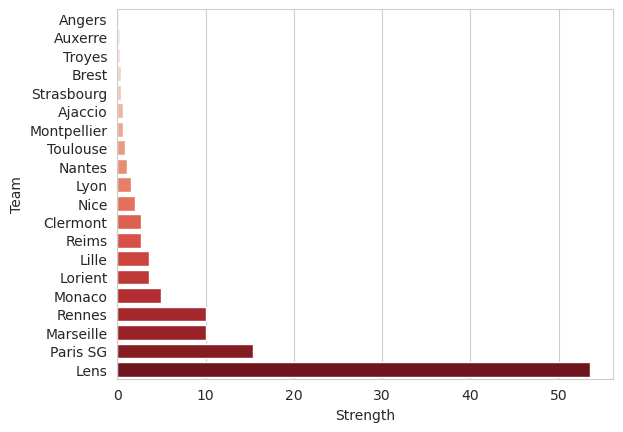

In [19]:
sorted_strength = strength.sort_values(by='Strength')

sns.set_style('whitegrid')
palette = sns.color_palette("Reds", len(strength))
sns.barplot(data = sorted_strength, y = 'Team', x = 'Strength',palette=palette)

Bon fini de faire mumuse, maintenant on essaie de prédire le winner (on se demande bien qui va gagner ouloulou)

In [20]:
ligue = BT_Tournament(strength['Strength'])

print(strength.iloc[ligue.winner()])

Team             Lens
Strength    53.517467
Name: 5, dtype: object


On est très surpris là dis donc oh la la, allez hop on a plié le game.

## Vérification empirique

On tire des forces selon une certaine loi (broné ou pas) et on vérifie les bails de l'article

On veut 

1. Une loi pas bornée

2. Une loi bornée "concave"

3. Une loi bornée "convexe"

<function matplotlib.pyplot.show(close=None, block=None)>

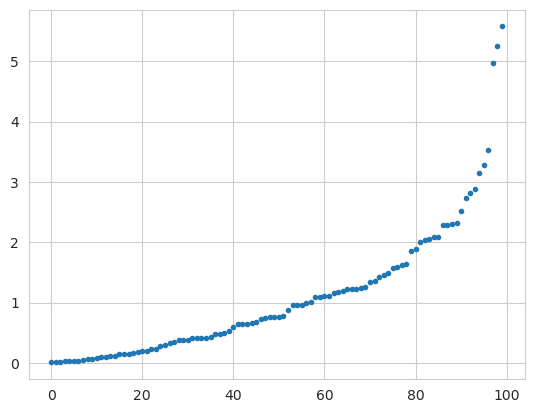

In [93]:
## Première loi:
str1 = np.random.exponential(1, size=100)

str1.sort()

plt.plot(str1,'.')
plt.show

In [61]:
import Bradley_Terry as bt

Tournoi_exp = bt.BT_Tournament(str1)

count = []

for i in range(1000):
    count.append(Tournoi_exp.winner())

count

[99,
 99,
 96,
 98,
 94,
 95,
 99,
 99,
 99,
 99,
 94,
 99,
 95,
 99,
 98,
 98,
 99,
 91,
 98,
 99,
 98,
 99,
 99,
 95,
 96,
 93,
 95,
 99,
 91,
 97,
 97,
 99,
 99,
 97,
 99,
 95,
 98,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 96,
 95,
 99,
 99,
 97,
 99,
 96,
 98,
 99,
 99,
 97,
 99,
 93,
 99,
 99,
 99,
 93,
 96,
 94,
 96,
 99,
 99,
 99,
 99,
 99,
 97,
 99,
 96,
 98,
 94,
 96,
 99,
 99,
 98,
 99,
 97,
 97,
 98,
 97,
 99,
 99,
 94,
 97,
 99,
 98,
 96,
 99,
 96,
 99,
 99,
 99,
 98,
 94,
 91,
 99,
 99,
 96,
 95,
 99,
 93,
 99,
 99,
 97,
 96,
 97,
 96,
 97,
 94,
 95,
 99,
 99,
 94,
 98,
 98,
 97,
 95,
 99,
 97,
 99,
 97,
 99,
 99,
 96,
 99,
 94,
 99,
 99,
 99,
 95,
 93,
 93,
 97,
 97,
 99,
 99,
 99,
 92,
 99,
 99,
 99,
 90,
 99,
 95,
 99,
 93,
 99,
 98,
 98,
 99,
 99,
 99,
 94,
 99,
 98,
 97,
 99,
 94,
 94,
 99,
 99,
 98,
 94,
 99,
 99,
 99,
 94,
 99,
 94,
 92,
 99,
 99,
 96,
 98,
 97,
 97,
 99,
 99,
 98,
 99,
 99,
 94,
 98,
 97,
 99,
 99,
 99,
 98,
 96,
 99,
 99,
 99,
 99,
 99,


<AxesSubplot: ylabel='Count'>

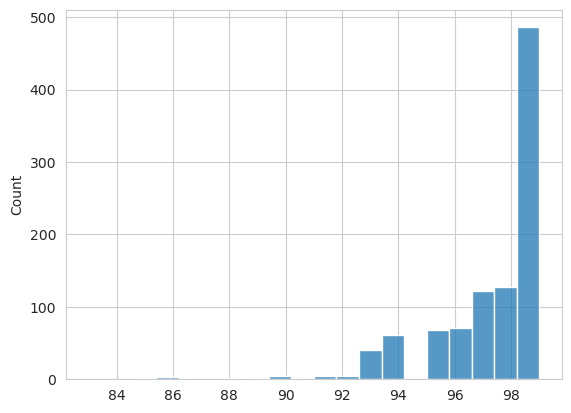

In [62]:
sns.histplot(count,bins=20)

In [63]:
print(count.count(99)/1000)

0.486


In [64]:
count10 = []

for i in range(10):
    count10.append(Tournoi_exp.winner())

count100 = []

for i in range(100):
    count100.append(Tournoi_exp.winner())

In [77]:
print(count10.count(99)/10)
print(count100.count(99)/100)

0.5
0.46


In [47]:
count10000 = []

for i in range(10000):
    count10000.append(Tournoi_exp.winner())

In [48]:
print(count10000.count(99)/10000)

0.4333


In [ ]:
print(count10000)

[99, 99, 99, 98, 99, 98, 99, 97, 99, 97, 98, 96, 96, 99, 99, 96, 98, 98, 98, 96, 99, 96, 99, 99, 99, 95, 99, 99, 96, 96, 97, 99, 98, 98, 98, 98, 98, 98, 98, 99, 98, 96, 99, 98, 99, 99, 98, 99, 97, 93, 98, 99, 99, 96, 99, 94, 99, 98, 99, 99, 99, 98, 97, 96, 98, 97, 98, 97, 99, 99, 96, 96, 99, 96, 96, 99, 99, 98, 96, 99, 98, 97, 99, 98, 99, 98, 99, 98, 99, 99, 99, 98, 97, 99, 99, 93, 99, 98, 99, 97, 99, 97, 98, 99, 96, 98, 98, 98, 94, 89, 99, 98, 98, 99, 99, 97, 99, 99, 99, 99, 99, 98, 98, 99, 97, 99, 98, 97, 98, 95, 97, 99, 99, 96, 99, 99, 97, 99, 99, 99, 99, 96, 94, 99, 99, 99, 99, 98, 99, 99, 98, 99, 99, 98, 99, 98, 99, 98, 99, 97, 97, 99, 99, 95, 98, 99, 97, 99, 96, 99, 99, 98, 96, 99, 99, 99, 97, 97, 99, 99, 99, 99, 98, 98, 99, 98, 99, 99, 99, 98, 99, 99, 99, 96, 98, 98, 99, 99, 99, 99, 97, 99, 99, 97, 99, 96, 99, 99, 98, 97, 99, 97, 99, 99, 98, 99, 99, 99, 99, 98, 99, 99, 96, 97, 97, 98, 99, 96, 98, 99, 97, 98, 98, 99, 98, 97, 99, 98, 99, 99, 99, 98, 99, 98, 98, 98, 99, 98, 99, 99,

Distribution 2: Loi bêta avec b > 2
Bornée sur [0,1]

<function matplotlib.pyplot.show(close=None, block=None)>

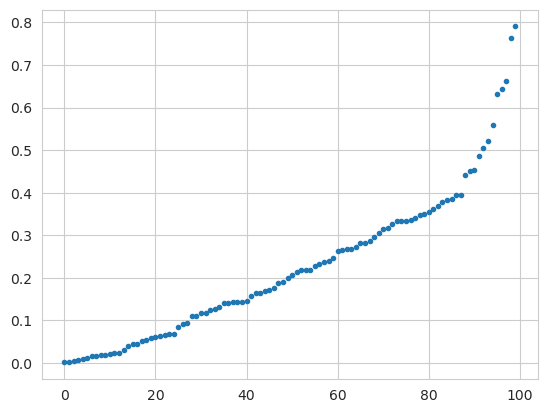

In [115]:
## Deuxième loi:
str2 = np.random.beta(1, 4, size=100)

str2.sort()

plt.plot(str2,'.')
plt.show

In [116]:
Tournoi_beta = bt.BT_Tournament(str2)

countbeta = []

for i in range(1000):
    countbeta.append(Tournoi_exp.winner())

countbeta

[97,
 99,
 99,
 96,
 93,
 98,
 98,
 98,
 99,
 95,
 95,
 99,
 98,
 93,
 99,
 99,
 99,
 99,
 99,
 99,
 94,
 99,
 97,
 91,
 99,
 99,
 93,
 97,
 96,
 97,
 97,
 97,
 93,
 92,
 96,
 94,
 97,
 95,
 95,
 98,
 99,
 94,
 93,
 99,
 99,
 94,
 94,
 99,
 99,
 95,
 99,
 94,
 96,
 99,
 97,
 98,
 98,
 97,
 99,
 95,
 95,
 97,
 99,
 99,
 97,
 99,
 99,
 99,
 93,
 94,
 94,
 93,
 98,
 96,
 95,
 94,
 99,
 99,
 99,
 99,
 99,
 98,
 97,
 97,
 99,
 93,
 99,
 94,
 93,
 99,
 99,
 95,
 97,
 99,
 99,
 95,
 98,
 99,
 99,
 92,
 99,
 99,
 99,
 95,
 93,
 94,
 99,
 97,
 96,
 99,
 99,
 99,
 94,
 98,
 98,
 99,
 94,
 99,
 96,
 99,
 99,
 99,
 97,
 97,
 97,
 98,
 98,
 99,
 99,
 99,
 96,
 99,
 99,
 96,
 94,
 99,
 99,
 97,
 99,
 96,
 98,
 96,
 96,
 95,
 99,
 98,
 94,
 95,
 99,
 99,
 97,
 96,
 99,
 97,
 98,
 91,
 99,
 98,
 99,
 95,
 97,
 97,
 98,
 99,
 99,
 99,
 98,
 95,
 99,
 99,
 99,
 99,
 99,
 99,
 98,
 99,
 99,
 98,
 94,
 98,
 99,
 98,
 97,
 99,
 96,
 96,
 94,
 97,
 99,
 99,
 99,
 91,
 98,
 99,
 99,
 99,
 97,
 96,
 99,
 99,


In [122]:
print(countbeta.count(99)/1000)

0.462


<function matplotlib.pyplot.show(close=None, block=None)>

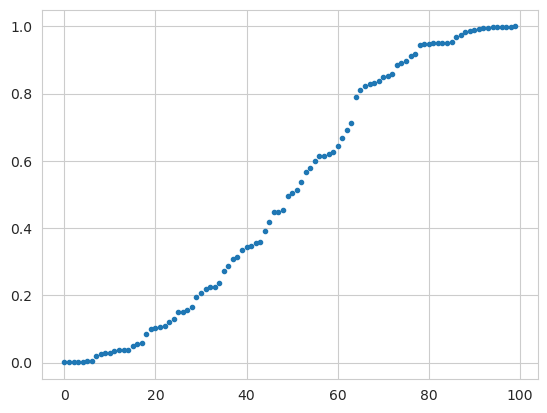

In [123]:
## Troisième loi:
str2 = np.random.beta(0.5, 0.5, size=100)

str2.sort()

plt.plot(str2,'.')
plt.show